 #  **🐼 Pandas Basics** 

I will use a csv of data on pokemon to show how we can use pandas to manipulate a dataset

Click [here](https://www.kaggle.com/abcsds/pokemon/discussion/195776) to download the dataset I will be using

<img src="https://static2.cbrimages.com/wordpress/wp-content/uploads/2019/02/Mewtwo-Shadow-Ball.jpg?q=50&fit=crop&w=740&h=397">

> “I see now that one’s birth is irrelevant. It’s what you do that determines who you are.” – Mewtwo

## Goals:

   - [ ] Read a file into pandas dataframe
   - [ ] Creating a new column using existing columns
   - [ ] making a simple plot of some of our information 
   - [ ] ~~become a pokemon Master!~~
    

In [20]:
import pandas as pd

## Reading a csv file 📖

In [2]:
df = pd.read_csv('pokemon_data.csv')

In [3]:
# df.head gives the first 5 rows of our data
# df.tail() gives the last 5 rows
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
# df.info() provides some information on your dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [5]:
df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## Finding null values in dataframe and replacing

In [6]:
# isnull Returns a boolean same-sized object indicating if the values are NA 
# together with sum we get the null values in each column
#change .sum() to .any() if you want a boolean True or false for Nan values
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
#filling missing type 2 values with None
# inplace commits the changes to the dataframe
df.fillna("None", inplace=True)


- [x] Read a file into pandas dataframe

## Creating a new column 

1. Find which pokemon is the strongest by first creating a new column called total stats
2. Select row from data with the pokemon with the greatest combined stats
3. Profit!

In [8]:
#taking the sum of  all stats columns to create total stats column
df["Total stats"] = df["HP"] + df["Attack"] + df["Defense"] + df["Sp. Atk"] + df["Sp. Def"] + df["Speed"]
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total stats
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625
4,4,Charmander,Fire,None,39,52,43,60,50,65,1,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,600
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True,700
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,600
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,680


In [9]:
#These are the strongest based on total stats column
(df[df["Total stats"] == df["Total stats"].max()]) 

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total stats
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,1,True,780
164,150,MewtwoMega Mewtwo Y,Psychic,None,106,150,70,194,120,140,1,True,780
426,384,RayquazaMega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True,780


In [10]:
# select all pokemon whose attacks equal 10
df[df["Attack"] == 10]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total stats
139,129,Magikarp,Water,None,20,10,55,15,20,80,1,False,200
230,213,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False,505
261,242,Blissey,Normal,None,255,10,10,75,135,55,2,False,540


## Dropping a column 💥

In [11]:
# dropped the generation column from the dataframe
df.drop(columns=['Generation'])

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Total stats
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,525
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,False,625
4,4,Charmander,Fire,None,39,52,43,60,50,65,False,309
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,True,600
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,True,700
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,600
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,680


 - [x] Creating a new column using existing columns

## Plotting a barchart 📊

<AxesSubplot:ylabel='Type 1'>

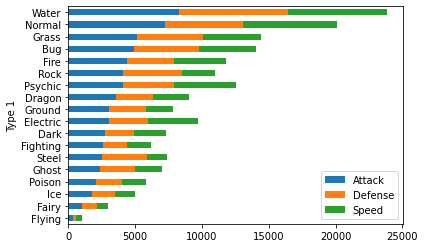

In [42]:
# 1. grouping by type1 
# 2. summing attack Defense and speed stats 
# 3. sorting values by the attack in ascending order as a stacked bar chart
df.groupby('Type 1')[['Attack', 'Defense', 'Speed']].sum().sort_values(by='Attack',ascending=True).plot.barh(stacked=True)

- [x] making a simple plot of some of our information 

## Thank you!

This was a brief summary of some of the things I have learned so far in pandas that I wanted to share  

if you want to learn how to do more cool things in pandas check out the docs [here]("https://pandas.pydata.org/pandas-docs/stable/index.html")  & [pandas cheatsheet]("https://www.kaggle.com/lavanyashukla01/pandas-numpy-python-cheatsheet")